In [142]:
import importlib
# import mymodule  # replace with your actual module

importlib.reload(ember.features)

from ember.features import PEFeatureExtractor

In [143]:
extractor = PEFeatureExtractor()

In [87]:
import os

base_dir = "/home/luca/WD/NortonDataset670/MALWARE"
malware_families_dirs = os.listdir(base_dir)

malware_filenames = []
for malware_family_dir in malware_families_dirs:
    malware_family_abs_dir = os.path.join(base_dir, malware_family_dir)
    for malware_filename in os.listdir(malware_family_abs_dir):
        malware_filenames.append(os.path.join(malware_family_abs_dir, malware_filename))

len(malware_filenames) == 67000

True

In [85]:
from multiprocessing import Pool
from tqdm import tqdm


def extract_features(malware_filename):
    with open(malware_filename, "rb") as f:
        f_bytes = f.read()
    return extractor.raw_features(f_bytes)


# with Pool(30) as p:
#     malware_ember_features = list(tqdm(p.imap_unordered(extract_features, malware_filenames), total=len(malware_filenames)))

## Dump malware EMBER features to a JsonL file

In [ ]:
import json


def convert_bytes(obj):
    if isinstance(obj, bytes):
        return obj.decode("utf-8", errors="replace")
    raise TypeError(f"Type {type(obj)} not serializable")


with open("malware_dataset_ember_features.jsonl", "w") as f:
    for malware_features in malware_ember_features:
        json.dump(malware_features, f, default=convert_bytes)
        f.write("\n")

## Vectorize features

In [ ]:
import pickle

with open("malware_ember_features.pkl", "rb") as f:
    malware_ember_features = pickle.load(f)

malware_ember_features[:10]

In [29]:
malware_ember_features[10]["sha256"]

'29d4c90a085a7ab09ccc4ef8f3704e11364e54418b05c0624b130c0ea799c1d0'

In [91]:
import importlib
# import mymodule  # replace with your actual module

importlib.reload(ember.features)

<module 'ember.features' from '/home/luca/feature_extraction/ember/ember/features.py'>

In [152]:
from ember.features import PEFeatureExtractor

extractor = PEFeatureExtractor()

features = []
for malware_features in malware_ember_features:
    features.append(extractor.process_raw_features(malware_features))

In [153]:
import pandas as pd
import numpy as np

# Extract SHA256 to use them as DataFrame index
shas_256 = [malware_features["sha256"] for malware_features in malware_ember_features]

# Create the dataframe with column names of the full dataset (train + test)
df = pd.DataFrame(features, index=shas_256, columns=extractor.column_names())
df.head()

,byte_hist_0,byte_hist_1,byte_hist_2,byte_hist_3,byte_hist_4,byte_hist_5,byte_hist_6,byte_hist_7,byte_hist_8,byte_hist_9,...,datadir_LOAD_CONFIG_TABLE_size,datadir_LOAD_CONFIG_TABLE_virtual_address,datadir_BOUND_IMPORT_size,datadir_BOUND_IMPORT_virtual_address,datadir_IAT_size,datadir_IAT_virtual_address,datadir_DELAY_IMPORT_DESCRIPTOR_size,datadir_DELAY_IMPORT_DESCRIPTOR_virtual_address,datadir_CLR_RUNTIME_HEADER_size,datadir_CLR_RUNTIME_HEADER_virtual_address
0cf67a545a97b61d6ad0a7612ace7dace3b0daca1acde5cdefd096c7d8333352,0.663330,0.010050,0.006836,0.004639,0.004842,0.003337,0.003052,0.002767,0.003011,0.001790,...,0.0,0.0,0.0,0.0,164.0,12288.0,0.0,0.0,0.0,0.0
f45e6ca3a2bbbaa1c514d81abe9daaa47f7d41da500e6933f61adf29f5f39835,0.441274,0.008437,0.005508,0.005264,0.005212,0.003521,0.003312,0.003887,0.003364,0.003260,...,0.0,0.0,0.0,0.0,692.0,12288.0,0.0,0.0,0.0,0.0
04be6f958103cd4d1f9fe2ec1d366b0b9645ce4b8fe6861f80413230527c8da5,0.333354,0.011434,0.006185,0.006022,0.009420,0.004476,0.003377,0.002828,0.010803,0.002075,...,0.0,0.0,0.0,0.0,356.0,36864.0,0.0,0.0,0.0,0.0
cd0604fe49001f54c49411ae8d32d138211f5efa9826a7db5f02fb911383fdd8,0.467019,0.006947,0.004483,0.003196,0.007546,0.001665,0.002330,0.001265,0.006303,0.001176,...,0.0,0.0,0.0,0.0,792.0,28672.0,0.0,0.0,0.0,0.0
cebe7e3b59999d1891f322a096ff4632ccbe722d264d586b23701b00e089316a,0.324341,0.017334,0.004272,0.004883,0.007080,0.002563,0.003784,0.005981,0.005005,0.004272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Get AVClass2 malware family labels

In [155]:
import sys

avclass_dataset_base_path = "/home/luca/ml-malware-concept-drift/"

sys.path.append(avclass_dataset_base_path)
from src.notebooks.clustering.utils import *

truncated_exe_info_path = (
    avclass_dataset_base_path
    + "src/notebooks/truncated_families_analysis/data/truncated_samples_per_family.csv"
)

from src.dataset.malware_dataset import MalwareDataset

malware_dataset = MalwareDataset(
    split=pd.Timestamp("2021-09-03 13:47:49"),
    truncated_fam_path=truncated_exe_info_path,
    truncated_threshold=7,
)

malware_dataset_sha_family = malware_dataset.df_malware_family_fsd
malware_dataset_sha_family.head()

,sha256,family,first_submission_date,benign
0,cfa2d5eeac7de9f134cb2e36d54a5c4053f62fdf9d5302...,buzy,2018-09-30 14:37:53,False
1,00ebebc75f61527282cee19ab7aed80693b63fbb969e71...,buzy,2022-03-02 12:20:37,False
2,f45e6ca3a2bbbaa1c514d81abe9daaa47f7d41da500e69...,buzy,2013-03-05 06:28:07,False
3,d694a203bb211751669f8742db877e8ebd5eff5b126abc...,buzy,2018-03-13 21:48:59,False
4,15c9feb810c48ffef1c7e32cbe58a11037da94e958fb1f...,buzy,2022-03-02 16:52:12,False


In [156]:
malware_dataset_sha_family.shape

(59800, 4)

In [157]:
df = df[df.index.isin(malware_dataset_sha_family["sha256"])]
df.shape

(59800, 2381)

In [158]:
malware_dataset_sha_family.set_index("sha256", inplace=True)
malware_dataset_sha_family.head()

,family,first_submission_date,benign
sha256,,,
cfa2d5eeac7de9f134cb2e36d54a5c4053f62fdf9d5302994557da1287719414,buzy,2018-09-30 14:37:53,False
00ebebc75f61527282cee19ab7aed80693b63fbb969e7154d17838f9dd08db2f,buzy,2022-03-02 12:20:37,False
f45e6ca3a2bbbaa1c514d81abe9daaa47f7d41da500e6933f61adf29f5f39835,buzy,2013-03-05 06:28:07,False
d694a203bb211751669f8742db877e8ebd5eff5b126abc4c3e59cdb81f9dbb56,buzy,2018-03-13 21:48:59,False
15c9feb810c48ffef1c7e32cbe58a11037da94e958fb1f34e8feca1643dd80eb,buzy,2022-03-02 16:52:12,False


## Random Train/Test split

In [210]:
from sklearn.model_selection import train_test_split

# Step 1: Align based on index
malware_features_df = df.sort_index()
sha_family_df = malware_dataset_sha_family.sort_index()

# Optional: make sure indices are identical now
print(all(malware_features_df.index == sha_family_df.index))

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    malware_features_df, sha_family_df["family"], test_size=0.35, random_state=42
)

True


In [211]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [212]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the test set
y_pred = rf.predict(X_test)

# Evaluate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8412326803631152

Classification Report:
                      precision    recall  f1-score   support

            4shared       0.91      1.00      0.96        32
              aauto       0.88      0.97      0.92        36
           adaebook       0.84      1.00      0.92        27
          addlyrics       0.70      0.97      0.81        34
          adgazelle       0.83      1.00      0.91        29
             adpack       0.82      0.97      0.89        34
           adposhel       0.95      1.00      0.97        36
           aenjaris       0.87      0.97      0.92        35
             agentb       0.91      0.75      0.82        40
             agentc       0.69      0.90      0.78        30
         agentcrypt       0.93      1.00      0.96        41
           agentino       0.92      1.00      0.96        36
             agobot       0.74      0.94      0.83        34
       airinstaller       0.97      1.00      0.99        36
          aitinject       0.96

In [213]:
feat_imp_df = pd.Series(rf.feature_importances_, index=df.columns)
feature_types = [
    "byte_hist",
    "datadir",
    "strings",
    "header",
    "general",
    "imp",
    "exports",
    "sections",
    "byte_entropy_hist",
]
column_groups = [
    [col for col in feat_imp_df.index if col.startswith(feature_type)]
    for feature_type in feature_types
]

# Compute absolute feature importance per type
feat_imp_per_type = [sum(feat_imp_df[cols]) for cols in column_groups]

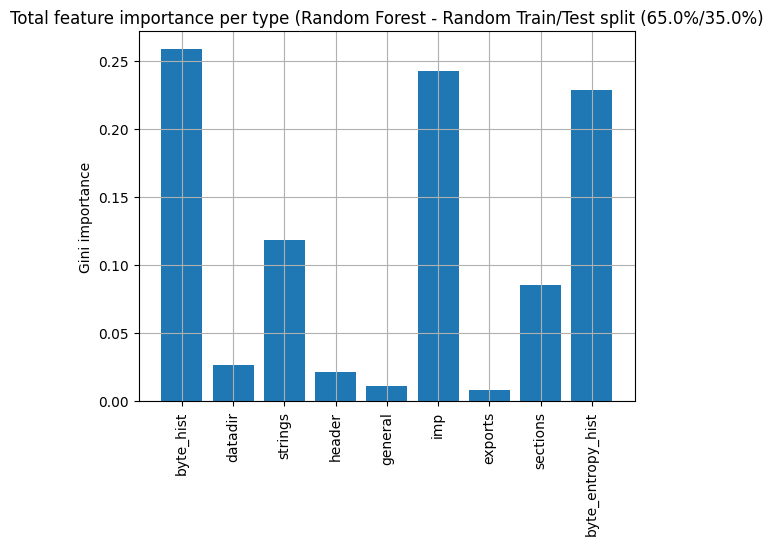

In [214]:
import matplotlib.pyplot as plt

train_len_perc = round(X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]), 4)
test_len_perc = round(1 - train_len_perc, 4) * 100
train_len_perc = train_len_perc * 100

plt.bar(feature_types, feat_imp_per_type)
plt.title(
    f"Total feature importance per type (Random Forest - Random Train/Test split ({train_len_perc}%/{test_len_perc}%)"
)
plt.grid(True)
plt.xticks(rotation=90)
plt.ylabel("Gini importance")
plt.show()

## Time-based Train/Test split

In [186]:
X_train_t, X_test_t = (
    malware_features_df[
        malware_features_df.index.isin(malware_dataset.training_dataset["sha256"])
    ],
    malware_features_df[
        malware_features_df.index.isin(malware_dataset.testing_dataset["sha256"])
    ],
)

y_train_t, y_test_t = (
    sha_family_df[sha_family_df.index.isin(malware_dataset.training_dataset["sha256"])][
        "family"
    ],
    sha_family_df[sha_family_df.index.isin(malware_dataset.testing_dataset["sha256"])][
        "family"
    ],
)

In [187]:
X_test_t, y_test_t = (
    X_test_t[y_test_t.isin(y_train_t)],
    y_test_t[y_test_t.isin(y_train_t)],
)

In [188]:
print(all(X_train_t.index == y_train_t.index))
print(all(X_test_t.index == y_test_t.index))

True
True


In [189]:
rf_t = RandomForestClassifier(n_jobs=-1)
rf_t.fit(X_train_t, y_train_t)

RandomForestClassifier(n_jobs=-1)

In [190]:
# Predict the test set
y_pred_t = rf_t.predict(X_test_t)

# Evaluate the accuracy
print("Accuracy:", accuracy_score(y_test_t, y_pred_t))
print(
    "\nClassification Report:\n",
    classification_report(y_test_t, y_pred_t, zero_division=0),
)

Accuracy: 0.6550677726077281

Classification Report:
                      precision    recall  f1-score   support

            4shared       0.83      0.83      0.83        23
              aauto       0.98      1.00      0.99        42
           adaebook       1.00      0.95      0.97        19
          addlyrics       0.02      1.00      0.05         1
          adgazelle       0.53      0.97      0.69        36
             adpack       0.70      0.89      0.79        64
           adposhel       0.00      0.00      0.00         0
           aenjaris       0.98      1.00      0.99        64
             agentb       0.98      0.81      0.89        67
         agentcrypt       0.22      1.00      0.36         2
           agentino       0.77      1.00      0.87        54
             agobot       0.86      1.00      0.92        18
       airinstaller       0.97      1.00      0.99        34
          aitinject       0.94      0.73      0.82        84
              alien       0.38

In [191]:
feat_imp_df = pd.Series(rf_t.feature_importances_, index=df.columns)
column_groups = [
    [col for col in feat_imp_df.index if col.startswith(feature_type)]
    for feature_type in feature_types
]

# Compute absolute feature importance per type
feat_imp_per_type_t = [sum(feat_imp_df[cols]) for cols in column_groups]

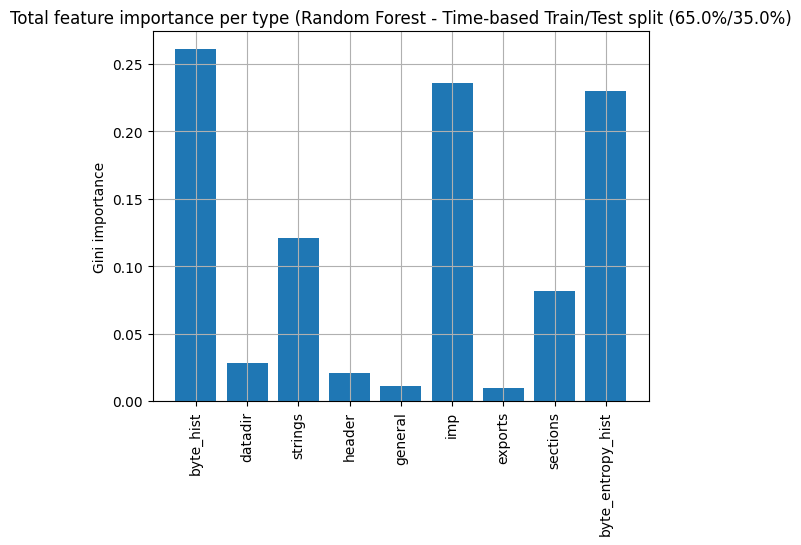

In [209]:
train_len_perc = round(X_train_t.shape[0] / (X_train_t.shape[0] + X_test_t.shape[0]), 2)
test_len_perc = round(1 - train_len_perc, 4) * 100
train_len_perc = train_len_perc * 100

plt.bar(feature_types, feat_imp_per_type_t)
plt.title(
    f"Total feature importance per type (Random Forest - Time-based Train/Test split ({train_len_perc}%/{test_len_perc}%)"
)
plt.grid(True)
plt.xticks(rotation=90)
plt.ylabel("Gini importance")
plt.show()

---------------------------------

In [ ]:
import pandas as pd


def flatten_dict_list(data):
    flat_data = []
    for el_i, item in enumerate(data):
        print(el_i)
        flat_item = {}
        for k, v in item.items():
            if isinstance(v, list):
                for i, val in enumerate(v):
                    flat_item[f"{k}_{i}"] = val
            else:
                flat_item[k] = v
        flat_data.append(flat_item)
    return pd.DataFrame(flat_data)


# Example usage
df = flatten_dict_list(malware_ember_features)
print(df.head())